In [ ]:
directory = '/Users/Ray/Downloads/stocks/'
fname = os.listdir(directory)[3]
filepath = os.path.join(directory, fname)
data = pd.read_csv(filepath, usecols=['Date', 'Close'])

In [ ]:
data

In [14]:



import pandas as pd
import os

directory = '/Users/Ray/Downloads/stocks/'

ticks = ['AAPL', 'JNJ', 'CSCO', 'GE','PG','WMT','JPM','XOM']

stock_df = pd.DataFrame()
# Loop through all the files in the directory
for tick in ticks:
    # Check if the file is a CSV file
    fname = tick + '.csv'
    filepath = os.path.join(directory, fname)
    # Read the CSV file
    data = pd.read_csv(filepath, usecols=['Date', 'Close'])
    # Rename the 'Close' column to the stock's symbol (filename without '.csv')

    # only consider after 2019
    data = data[data['Date'] >= '2017-01-01']
    
    data.rename(columns={'Close': tick}, inplace=True)
    # Merge or concatenate the data into the main DataFrame
    if stock_df.empty:
        stock_df = data
    else:
        stock_df = pd.merge(stock_df, data, on='Date', how='outer')

stock_df.set_index('Date', inplace=True)

save_path = './stocks.csv'
stock_df.to_csv(save_path)


In [15]:
df = pd.read_csv(save_path)
df.head(5)

# remove date column
ticks = df.columns[1:]


In [40]:
df

,Date,AAPL,JNJ,CSCO,GE,PG,WMT,JPM,XOM
0,2017-01-03,116.150002,115.839996,30.540001,30.471153,84.199997,68.660004,87.230003,90.889999
1,2017-01-04,116.019997,115.650002,30.100000,30.480770,84.500000,69.059998,86.910004,89.889999
2,2017-01-05,116.610001,116.860001,30.170000,30.307692,85.059998,69.209999,86.110001,88.550003
3,2017-01-06,117.910004,116.300003,30.230000,30.394230,85.029999,68.260002,86.120003,88.500000
4,2017-01-09,118.989998,116.279999,30.180000,30.250000,84.400002,68.709999,86.180000,87.040001
...,...,...,...,...,...,...,...,...,...
812,2020-03-26,258.440002,126.570000,40.580002,8.120000,107.379997,109.820000,98.120003,38.820000
813,2020-03-27,247.740005,123.160004,38.820000,7.620000,110.169998,109.580002,91.129997,36.950001
814,2020-03-30,254.809998,133.009995,40.320000,7.890000,115.000000,115.190002,93.500000,37.500000
815,2020-03-31,254.289993,131.130005,39.310001,7.940000,110.000000,113.620003,90.029999,37.970001


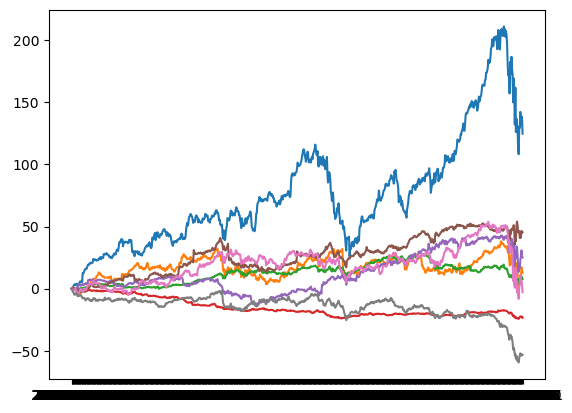

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
df_align = df[ticks].apply(lambda x: x - x[0])
df_align['Date'] = df['Date']
for tick in ticks:
    plt.plot(df_align['Date'], df_align[tick], label=tick)

In [24]:
mx = df[ticks].corr()
mx

,AAPL,JNJ,CSCO,GE,PG,WMT,JPM,XOM
AAPL,1.000000,0.546691,0.525021,-0.602677,0.685072,0.816456,0.827860,-0.616379
JNJ,0.546691,1.000000,0.415558,-0.419751,0.420003,0.577944,0.557918,-0.121805
CSCO,0.525021,0.415558,1.000000,-0.833457,0.452086,0.705700,0.674112,-0.201654
GE,-0.602677,-0.419751,-0.833457,1.000000,-0.399083,-0.793097,-0.665369,0.476449
PG,0.685072,0.420003,0.452086,-0.399083,1.000000,0.780340,0.514171,-0.598418
WMT,0.816456,0.577944,0.705700,-0.793097,0.780340,1.000000,0.779783,-0.593204
JPM,0.827860,0.557918,0.674112,-0.665369,0.514171,0.779783,1.000000,-0.287834
XOM,-0.616379,-0.121805,-0.201654,0.476449,-0.598418,-0.593204,-0.287834,1.000000


In [36]:
# find the most correlated stock
mx = df[ticks].corr()


max_corr = -1
idx_max_corr = (0, 0)

min_corr = 1
idx_min_corr = (0, 0)

most_uncorrelated = (0, 0)
uncorr = 1

for i in range(len(mx)):
    for j in range(i+1, len(mx)):
        
        if mx.iloc[i, j] > max_corr:
            max_corr = mx.iloc[i, j]
            idx_max_corr = (i, j)
        if mx.iloc[i, j] < min_corr:
            min_corr = mx.iloc[i, j]
            idx_min_corr = (i, j)
        if abs(mx.iloc[i, j]) < uncorr:
            uncorr = mx.iloc[i, j]
            most_uncorrelated = (i, j)

print('The most correlated stocks are {} and {} with a correlation of {:.2f}'.format(ticks[idx_max_corr[0]], ticks[idx_max_corr[1]], max_corr))    
print('The least correlated stocks are {} and {} with a correlation of {:.2f}'.format(ticks[idx_min_corr[0]], ticks[idx_min_corr[1]], min_corr))
print('The most uncorrelated stocks are {} and {} with a correlation of {:.2f}'.format(ticks[most_uncorrelated[0]], ticks[most_uncorrelated[1]], uncorr))

The most correlated stocks are AAPL and JPM with a correlation of 0.83
The least correlated stocks are CSCO and GE with a correlation of -0.83
The most uncorrelated stocks are JNJ and XOM with a correlation of -0.12
